<a href="https://colab.research.google.com/github/zjminglead/BESTORE/blob/master/data_prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive/')
!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content


# 设置索引

* 设置索引的目的是便于我们查找数据。
* 在Excel中，一般都是有索引的，如果没索引数据看起来会很乱，当然也会有例外，数据表就是没有索引的。这个时候插入一行一列就是为表添加索引。
* 在Python中，如果表没有索引，会默认用从0开始的自然数做索引

## 1.为无索引表添加索引

* 通过给表df的columns参数传入列索引值

* index参数传入行索引值

In [40]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers_NAN.csv')
print(df.head())

# 为表添加列索引
df.columns = ['客户ID', '性别', '年龄', '年收入', '消费等级']
print(df.head())

# 为表添加行索引
# print((df.index).dtype)
df.index = range(1, len(df) + 1, 1)
print(df.head())

   CustomerID   Genre   Age  Annual_Income_(k$)  Spending_Score
0         1.0    Male  19.0                15.0            39.0
1         2.0    Male  21.0                15.0            81.0
2         3.0  Female  20.0                16.0             6.0
3         4.0  Female  23.0                16.0            77.0
4         5.0  Female  31.0                17.0            40.0
   客户ID      性别    年龄   年收入  消费等级
0   1.0    Male  19.0  15.0  39.0
1   2.0    Male  21.0  15.0  81.0
2   3.0  Female  20.0  16.0   6.0
3   4.0  Female  23.0  16.0  77.0
4   5.0  Female  31.0  17.0  40.0
   客户ID      性别    年龄   年收入  消费等级
1   1.0    Male  19.0  15.0  39.0
2   2.0    Male  21.0  15.0  81.0
3   3.0  Female  20.0  16.0   6.0
4   4.0  Female  23.0  16.0  77.0
5   5.0  Female  31.0  17.0  40.0


## 2.重新设置索引

- 重新设置索引，一般指行索引的设置。有的表虽然有索引，但不是我们想要的索引，比如现在有一个表是把序号作为行索引，而我们想要把订单编号作为行索引

- 在Excel中重新设置行索引比较简单，你想让哪一列做行索引，直接把这一列拖到第一列的位置即可。

- 在Python中可以利用set_index()方法重新设置索引列，在set_index()里指明要用作行索引的列的名称即可。

- 在重新设置索引时，还可以给 set_index()方法传入两个或多个列名，我们把这种一个表中用多列来做索引的方式称为层次化索引

- 层次化索引一般用在某一列中含有多个重复值的情况下。




In [71]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers_NAN.csv')
print(df.head())

# 为表添加列索引
df.columns = ['客户ID', '性别', '年龄', '年收入', '消费等级']

# 删除NAN值
df = df.dropna()

# 转换‘客户ID'的数据类型
df["客户ID"] = df["客户ID"].astype(np.int64)
print(df["客户ID"].dtype)
df = df.set_index("客户ID")

print(df.head())
# print(df1.info())
# 加完索引保存到excel
df.to_excel('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers_index.xlsx', sheet_name='Mall_Customers_index')

   CustomerID   Genre   Age  Annual_Income_(k$)  Spending_Score
0         1.0    Male  19.0                15.0            39.0
1         2.0    Male  21.0                15.0            81.0
2         3.0  Female  20.0                16.0             6.0
3         4.0  Female  23.0                16.0            77.0
4         5.0  Female  31.0                17.0            40.0
int64
          性别    年龄   年收入  消费等级
客户ID                          
1       Male  19.0  15.0  39.0
2       Male  21.0  15.0  81.0
3     Female  20.0  16.0   6.0
4     Female  23.0  16.0  77.0
5     Female  31.0  17.0  40.0


## 3.重命名索引

- 重命名索引是针对现有索引名进行修改的，就是改字段名。

- Excel实现：
- 在Excel中重命名索引比较简单，就是直接修改字段名。
- Python实现：
- 在Python中重命名索引，我们利用的是rename()方法，在rename后的括号里指明要修改的行索引及列索引名。


In [70]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers_NAN.csv')
# 重命名列索引
print(df.columns)
'客户ID', '性别', '年龄', '年收入', '消费等级'
df = df.rename(columns = {'CustomerID': '客户ID', 'Genre':'性别', 
                     'Age':'年龄', 'Annual_Income_(k$)':'年收入', 'Spending_Score':'消费等级'})
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')
Index(['客户ID', '性别', '年龄', '年收入', '消费等级'], dtype='object')


## 4.重置索引
- 重置索引主要用在层次化索引表中
- 重置索引是将索引列当作一个columns进行返回。
- 在下图左侧的表中，Z1、Z2是一个层次化索引，经过重置索引以后，Z1、Z2这两个索引以columns的形式返回，变为常规的两列。
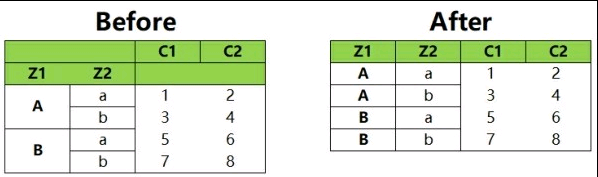

在Python利用的是reset_index()方法，reset_index()方法常用的参数如下：



```
reset_index(level=None, drop=False, inplace=False)
```
- level参数用来指定要将层次化索引的第几级别转化为columns

- 第一个索引为0级，第二个索引为1级，默认为全部索引，即默认把索引全部转化为columns。

- drop参数用来指定是否将原索引删掉，即不作为一个新的columns，默认为False，即不删除原索引。

- inplace参数用来指定是否修改原数据表。inplace：bool, default False。修改数据帧（不要创建新对象）。

- reset_index()方法常用于数据分组、数据透视表中。


In [76]:
import pandas as pd
import numpy as np
df = pd.DataFrame([('bird', 389.0),
                   ('bird', 24.0),
                   ('mammal', 80.5),
                   ('mammal', np.nan)],
                  index=['falcon', 'parrot', 'lion', 'monkey'],
                  columns=('class', 'max_speed'))
print(df)

# 重置索引时，将旧索引添加为列，并使用新的顺序索引
# df.reset_index(inplace=True)
df1 = df.reset_index()
print(df1)

# 使用drop参数来避免将旧索引添加为列
df.reset_index(drop=True, inplace=False)


         class  max_speed
falcon    bird      389.0
parrot    bird       24.0
lion    mammal       80.5
monkey  mammal        NaN
    index   class  max_speed
0  falcon    bird      389.0
1  parrot    bird       24.0
2    lion  mammal       80.5
3  monkey  mammal        NaN


,class,max_speed
0,bird,389.0
1,bird,24.0
2,mammal,80.5
3,mammal,NaN


# 缺失值处理

缺失值就是由某些原因导致部分数据为空，对于为空的这部分数据我们一般有两种处理方式
* 一种是删除，即把含有缺失值的数据删除；
* 另一种是填充，即把缺失的那部分数据用某个值代替。


## 1.EXCEL处理方法

可以利用定位条件（按快捷键Ctrl+G可弹出该对话框）查找。在定位条件对话框中选择空值，单击确定就会把所有的空值选中

## 2.Python查看缺失值整体情况

中直接调用 info()方法就会返回每一列的缺失情况。


In [7]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers_NAN.csv')
print(df.head())
print(df.info())

   CustomerID   Genre   Age  Annual_Income_(k$)  Spending_Score
0         1.0    Male  19.0                15.0            39.0
1         2.0    Male  21.0                15.0            81.0
2         3.0  Female  20.0                16.0             6.0
3         4.0  Female  23.0                16.0            77.0
4         5.0  Female  31.0                17.0            40.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          198 non-null    float64
 1   Genre               198 non-null    object 
 2   Age                 190 non-null    float64
 3   Annual_Income_(k$)  191 non-null    float64
 4   Spending_Score      198 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
None


Python中缺失值一般用NaN表示，从用info()方法的结果来看,Age有8个NULL值，Annual_Income_(k$)有7个控制

## 3.isnull()方法来判断哪个值是缺失值

* 如果是缺失值则返回True
* 如果不是缺失值则返回False。

In [ ]:
df.isnull()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


## 4.缺失值分类

- 一行中某个字段是缺失值；
- 一行中的字段全部为缺失值，即为一个空白行。

EXCEL操作方法：在Excel中，这两种缺失值都可以通过在定位条件（按快捷键Ctrl+G可弹出该对话框）对话框中选择空值找到。
这样含有缺失值的部分就会被选中，包括某个具体的单元格及一整行，然后单击鼠标右键在弹出的删除对话框中选择删除整行选项，并单击确定按钮即可实现整行的删除。

## 5.dropna()方法删除缺失值

* 也就是只要某一行有缺失值就把这一行删除。
* dropna常用参数：
* DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
  - axis=0：删除包含缺失值（NaN）的行(默认)

  - axis=1：删除包含缺失值（NaN）的列

  - how=‘any’：要有缺失值（NaN）出现删除（默认）

  - how=‘all’：所有的值都缺失（NaN）才删除

* data.dropna(how = 'all') # 传入这个参数后将只丢弃全为缺失值的那些行
* data.dropna(axis = 1)  # 丢弃有缺失值的列（一般不会这么做，这样会删掉一个特征）
* data.dropna(axis=1,how="all")   # 丢弃全为缺失值的那些列
* data.dropna(axis=0,subset = ["Age", "Sex"])   # 丢弃‘Age’和‘Sex’这两列中有缺失值的行

In [ ]:
df1 = df.dropna()
print(df.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          198 non-null    float64
 1   Genre               198 non-null    object 
 2   Age                 190 non-null    float64
 3   Annual_Income_(k$)  191 non-null    float64
 4   Spending_Score      198 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          183 non-null    float64
 1   Genre               183 non-null    object 
 2   Age                 183 non-null    float64
 3   Annual_Income_(k$)  183 non-null    float64
 4   Spending_Score      183 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.6+ 

In [ ]:
df2 = df.dropna(axis = 1, how = 'all');
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          198 non-null    float64
 1   Genre               198 non-null    object 
 2   Age                 190 non-null    float64
 3   Annual_Income_(k$)  191 non-null    float64
 4   Spending_Score      198 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
None


## 6.read_csv自动跳过空白行

*   skip_blank_lines默认为True
*   自动忽略空白行



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers_NAN.csv', skip_blank_lines=True)
print(df.info())
print(df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          198 non-null    float64
 1   Genre               198 non-null    object 
 2   Age                 190 non-null    float64
 3   Annual_Income_(k$)  191 non-null    float64
 4   Spending_Score      198 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
None
    CustomerID   Genre   Age  Annual_Income_(k$)  Spending_Score
0          1.0    Male  19.0                15.0            39.0
1          2.0    Male  21.0                15.0            81.0
2          3.0  Female  20.0                16.0             6.0
3          4.0  Female  23.0                16.0            77.0
4          5.0  Female  31.0                17.0            40.0
5          6.0  Female  22.0                17.0            76.0
6          7.0  Female  35.0             

# 缺失值填充

* 数据是宝贵的，一般情况下只要数据缺失比例不是过高（不大于30%），尽量别删除，而是选择填充。
* 填充方法：
  - 平均值
  - 众数
  - 向前填充
  - 向后填充
  - 插值方法
* pad / ffill：向前填充
* bfill / backfill：向后填充
* 使用 method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
* 使用上一个有效值填充
* df.fillna(method='backfill')
* 同 backfill
* df.fillna(method='bfill')
* 把当前值广播到后边的缺失值
* df.fillna(method='pad')
* 同 pad
* df.fillna(method='ffill')

## 1.fillna()方法对所有缺失值进行填充

- 在fillna后面的括号中输入要填充的值就好

In [ ]:
df1 = df.fillna(0)
print(df1.head(20))

    CustomerID   Genre   Age  Annual_Income_(k$)  Spending_Score
0          1.0    Male  19.0                15.0            39.0
1          2.0    Male  21.0                15.0            81.0
2          3.0  Female  20.0                16.0             6.0
3          4.0  Female  23.0                16.0            77.0
4          5.0  Female  31.0                17.0            40.0
5          6.0  Female  22.0                17.0            76.0
6          7.0  Female  35.0                18.0             6.0
7          8.0  Female  23.0                18.0            94.0
8          9.0    Male  64.0                19.0             3.0
9         10.0  Female  30.0                19.0            72.0
10         0.0       0   0.0                 0.0             0.0
11         0.0       0   0.0                 0.0             0.0
12        13.0  Female  58.0                20.0            15.0
13        14.0  Female  24.0                20.0            77.0
14        15.0    Male  3

## 2.向前/向后填充

In [ ]:
df_ffill = df.fillna(method='ffill')
print(df_ffill.head(15))
df_bfill = df.fillna(method='bfill')
print(df_bfill.head(15))
# 主要看第10和11行

    CustomerID   Genre   Age  Annual_Income_(k$)  Spending_Score
0          1.0    Male  19.0                15.0            39.0
1          2.0    Male  21.0                15.0            81.0
2          3.0  Female  20.0                16.0             6.0
3          4.0  Female  23.0                16.0            77.0
4          5.0  Female  31.0                17.0            40.0
5          6.0  Female  22.0                17.0            76.0
6          7.0  Female  35.0                18.0             6.0
7          8.0  Female  23.0                18.0            94.0
8          9.0    Male  64.0                19.0             3.0
9         10.0  Female  30.0                19.0            72.0
10        10.0  Female  30.0                19.0            72.0
11        10.0  Female  30.0                19.0            72.0
12        13.0  Female  58.0                20.0            15.0
13        14.0  Female  24.0                20.0            77.0
14        15.0    Male  3

## 3.按不同列填充

In [ ]:
df_col = df.fillna({'Spending_Score': 88})
print(df_col.head(15))
df_cols = df.fillna({'Spending_Score': 88, 'Age': 33})
print(df_cols.head(15))

    CustomerID   Genre   Age  Annual_Income_(k$)  Spending_Score
0          1.0    Male  19.0                15.0            39.0
1          2.0    Male  21.0                15.0            81.0
2          3.0  Female  20.0                16.0             6.0
3          4.0  Female  23.0                16.0            77.0
4          5.0  Female  31.0                17.0            40.0
5          6.0  Female  22.0                17.0            76.0
6          7.0  Female  35.0                18.0             6.0
7          8.0  Female  23.0                18.0            94.0
8          9.0    Male  64.0                19.0             3.0
9         10.0  Female  30.0                19.0            72.0
10         NaN     NaN   NaN                 NaN            88.0
11         NaN     NaN   NaN                 NaN            88.0
12        13.0  Female  58.0                20.0            15.0
13        14.0  Female  24.0                20.0            77.0
14        15.0    Male  3

# 重复值处理

* 重复数据就是同样的记录有多条，对于这样的数据我们一般做删除处理。
* 在Excel中依次单击菜单栏中的数据>数据工具>删除重复值，就可以删除重复数据了

## 1.drop_duplicates()方法

* 该方法默认对所有值进行重复值判断，且默认保留第一个（行）值
* 还可以自定义删除重复项时保留哪个，默认保留第一个，也可以设置保留最后一个，或者全部不保留。
* 通过传入参数keep进行设置，参数keep默认值是first，即保留第一个值；
* 也可以是last，保留最后一个值；
* 还可以是False，即把重复值全部删除。

In [ ]:
# 针对所有字段进行的重复值判断
df1 = df.drop_duplicates()
print(df1)
# 针对某一列或某几列进行重复值删除的判断
df2 = df.drop_duplicates(subset= ['CustomerID', 'Spending_Score', 'Age'])
print(df2)
# 保留最后一个重复值
df3 = df.drop_duplicates(subset= ['CustomerID', 'Spending_Score'], keep = "last")
# 不保留任何重复值
df4 = df.drop_duplicates(subset= ['CustomerID', 'Spending_Score'], keep = False)

     CustomerID   Genre   Age  Annual_Income_(k$)  Spending_Score
0           1.0    Male  19.0                15.0            39.0
1           2.0    Male  21.0                15.0            81.0
2           3.0  Female  20.0                16.0             6.0
3           4.0  Female  23.0                16.0            77.0
4           5.0  Female  31.0                17.0            40.0
..          ...     ...   ...                 ...             ...
195       196.0  Female  35.0               120.0            79.0
196       197.0  Female  45.0               126.0            28.0
197       198.0    Male  32.0               126.0            74.0
198       199.0    Male  32.0               137.0            18.0
199       200.0    Male  30.0               137.0            83.0

[199 rows x 5 columns]
     CustomerID   Genre   Age  Annual_Income_(k$)  Spending_Score
0           1.0    Male  19.0                15.0            39.0
1           2.0    Male  21.0                15.0   

# 单特征异常值检测与处理

 * **异常值检测一定是在缺失值已经处理完了之后进行的**
 * **异常值有两种类型：单变量和多变量。 以上，我们讨论了单变量异常值的例子。 当我们看到单变量的分布时，可以找到这些异常值。 多变量异常值是n维空间中的异常值，必须通过多维度的分布。**

---
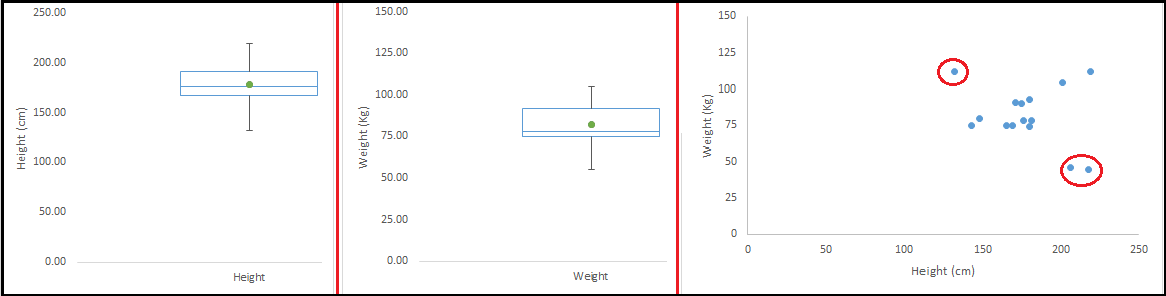


异常值就是相比正常数据而言过高或过低的数据，比如一个人的年龄是0岁或者300岁都算是一个异常值，因为这和实际情况差距过大。

* <strong>发现异常的方式<strong>:
  - 根据业务经验划定不同指标的正常范围，超过该范围的值算作异常值。
  - 通过绘制箱形图，把大于（小于）箱形图上边缘（下边缘）的点称为异常值。
  - 如果数据服从正态分布，则可以利用3σ 原则；如果一个数值与平均值之间的偏差超过3倍标准差，那么我们就认为这个值是异常值。

* 异常值的处理方式
  - 删除
  - 把异常当作缺失值来填充
  - 把异常值当作特殊情况，研究异常值出现的原因
* Excel实现
  - 在Excel中，删除异常值只要通过筛选把异常值对应的行找出来，然后单击鼠标右键选择删除行即可。
  - 对异常值进行填充，其实就是对异常值进行替换，同样通过筛选功能把异常值先找出来，然后把这些异常值替换成要填充的值即可。

* Python实现
  - 通过过滤的方法对异常值进行删除
  - 对异常值进行填充，就是对异常值进行替换，利用replace()方法可以对特定的值进行替换。

* <a href ="https://segmentfault.com/a/1190000015926584">异常值检测方法小结</a>


## 1.箱线图异常值检测
- 四分位距(IQR)就是上四分位与下四分位的差值。而我们通过IQR的1.5倍为标准
- 规定：超过上四分位+1.5倍IQR距离，或者下四分位-1.5倍IQR距离的点为异常值。
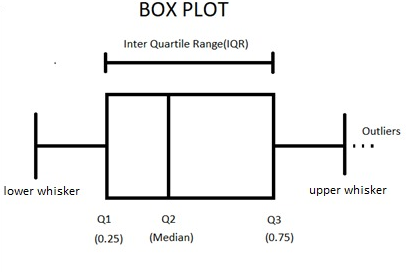

In [ ]:
Percentile = np.percentile(df['length'],[0,25,50,75,100])
IQR = Percentile[3] - Percentile[1]
UpLimit = Percentile[3]+ageIQR*1.5
DownLimit = Percentile[1]-ageIQR*1.5

异常检测的上限为130.375, 下限为-22.625


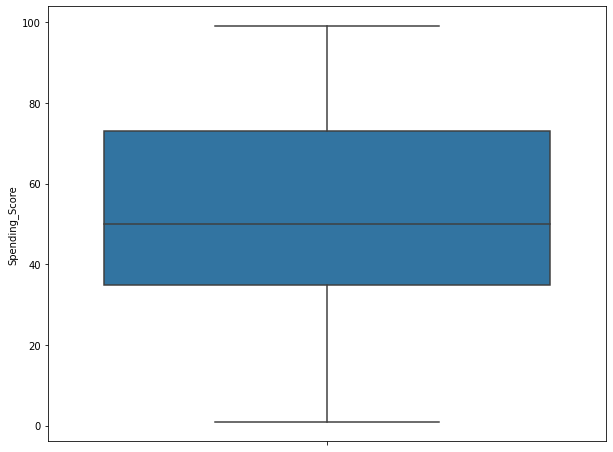

In [11]:
import numpy as np
import pandas as pd

# 读取数据.csv
df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers.csv')
# 获取四分位对应的数值
Percentile = np.percentile(df['Spending_Score'], [0,25,50,75,100])
# 获取四分位距IQR
IQR = Percentile[3] - Percentile[1]
UpLimit = Percentile[3] + IQR * 1.5
DownLimit = Percentile[1] - IQR * 1.5
print('异常检测的上限为{}, 下限为{}'.format(UpLimit, DownLimit))

# 使用seaborn的可视化方法boxplot
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
f,ax=plt.subplots(figsize=(10,8))
sns.boxplot(y = 'Spending_Score', data = df, ax =ax)
plt.show()

In [13]:
# 第二种方法,这种方法比较简单
import pandas as pd
# Outliers will be any points below Lower_Whisker or above Upper_Whisker
# 读取数据.csv
df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers.csv')
Q1=df['Spending_Score'].quantile(0.25)
Q3=df['Spending_Score'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

34.75
73.0
38.25
-22.625 130.375


## 2.使用Using Scatter plot
这种图就得指定行索引和列索引了

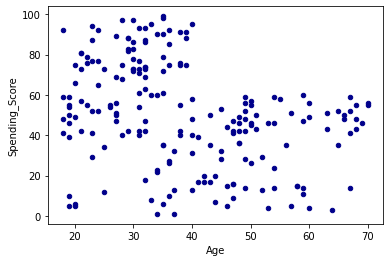

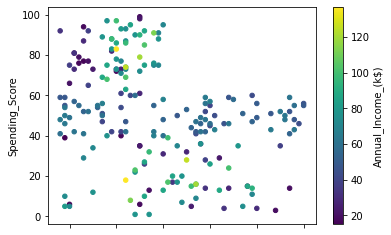

In [27]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers.csv')

ax1 = df.plot.scatter(x='Age', y='Spending_Score',c='DarkBlue')
# 使用由Annual_Income_(k$)列确定的颜色。
ax2 = df.plot.scatter(x='Age', y='Spending_Score', c='Annual_Income_(k$)', colormap='viridis')

## 3.使用 Z score
我们找到数据集中每个数据点的 z-score，如果 z-score 大于 3，我们可以将该点归类为异常值。 3 个标准差之外的任何点都是异常值。

In [23]:
# Get the Z-score table
import pandas as pd
import numpy as np
from scipy import stats

# 异常值检测一定是在缺失值已经处理完了之后进行的
# df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers_NAN.csv')
df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers.csv')

z = np.abs(stats.zscore(df.Spending_Score))
print(z)
# 找到异常值的点，并按照数组输出
# threshold=3
print(np.where(z>3))
# 得到小于3的值
df1=df[(z < 3)]
print(df1)
print(df1.shape)

[0.43480148 1.19570407 1.71591298 1.04041783 0.39597992 1.00159627
 1.71591298 1.70038436 1.83237767 0.84631002 1.4053405  1.89449216
 1.36651894 1.04041783 1.44416206 1.11806095 0.59008772 0.61338066
 0.82301709 1.8556706  0.59008772 0.88513158 1.75473454 0.88513158
 1.4053405  1.23452563 0.7065524  0.41927286 0.74537397 1.42863343
 1.7935561  0.88513158 1.7935561  1.62274124 1.4053405  1.19570407
 1.28887582 0.88513158 0.93948177 0.96277471 0.59008772 1.62274124
 0.55126616 0.41927286 0.86183865 0.5745591  0.18634349 0.12422899
 0.3183368  0.3183368  0.06987881 0.38045129 0.14752193 0.38045129
 0.20187212 0.35715836 0.00776431 0.16305055 0.03105725 0.16305055
 0.22516505 0.18634349 0.06987881 0.34162973 0.03105725 0.34162973
 0.00776431 0.08540743 0.34162973 0.12422899 0.18634349 0.3183368
 0.04658587 0.22516505 0.12422899 0.14752193 0.10870037 0.08540743
 0.06987881 0.3183368  0.03105725 0.18634349 0.35715836 0.24069368
 0.26398661 0.16305055 0.30280817 0.18634349 0.38045129 0.16305

## 2.异常值填充

- 对异常值进行替换，利用replace()方法可以对特定的值进行替换。
- [df.replace()详细介绍](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)

In [29]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})
print(df)
df.replace(0, 5)

   A  B  C
0  0  5  a
1  1  6  b
2  2  7  c
3  3  8  d
4  4  9  e


,A,B,C
0,5,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


## 5.异常值删除

In [21]:
df = df[df['Spending_Score'] < Upper_Whisker]
df = df[df['Spending_Score'] > Lower_Whisker]
print(df.head(15))

    CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0            1    Male   19                  15              39
1            2    Male   21                  15              81
2            3  Female   20                  16               6
3            4  Female   23                  16              77
4            5  Female   31                  17              40
5            6  Female   22                  17              76
6            7  Female   35                  18               6
7            8  Female   23                  18              94
8            9    Male   64                  19               3
9           10  Female   30                  19              72
10          11    Male   67                  19              14
11          12  Female   35                  19              99
12          13  Female   58                  20              15
13          14  Female   24                  20              77
14          15    Male   37             

# 多特征异常值检测与处理

这种需要补充

# 数据类型转换

* Python的六种数据类型
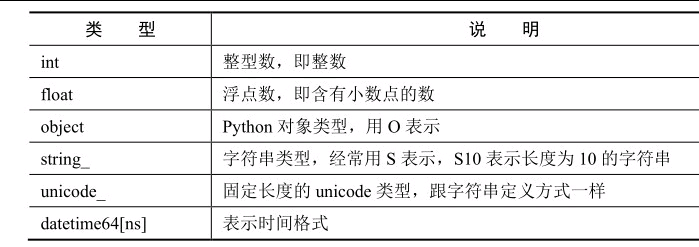

## 1.数据类型的获取方式

* 
```
df.info
```

* 
```
dtype
```





In [30]:
# 获取每一列的数据类型
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers.csv')
print(df.info())

# 获取某一列的数据类型
print(df['Age'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
int64


## 2.类型转换

- 在Python中，我们利用astype()方法对数据类型进行转换
- astype后面的括号里指明要转换的目标类型即可。

In [34]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers.csv')

df["Annual_Income_(k$)"].dtype

# 将df["Annual_Income_(k$)"]从int类型转换为float类型
df1 = df["Annual_Income_(k$)"].astype("float64")
print(df1.head(10))

0    15.0
1    15.0
2    16.0
3    16.0
4    17.0
5    17.0
6    18.0
7    18.0
8    19.0
9    19.0
Name: Annual_Income_(k$), dtype: float64
